In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from scikit_posthocs import posthoc_dunn

In [29]:
X,y = make_moons(n_samples=400,noise=0.09,random_state=2)

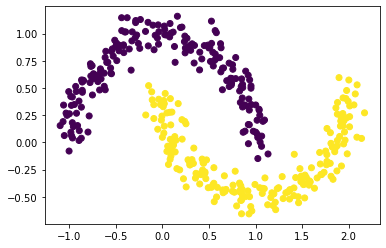

In [30]:
plt.scatter(X[:,0],X[:,1],c=y)

## K MEANS

In [31]:
clus_km = KMeans(n_clusters=2)
labels_km = clus_km.fit_predict(X)

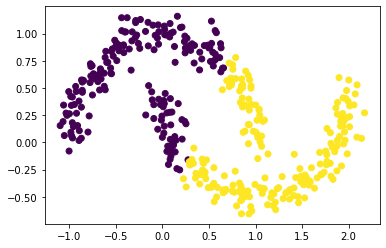

In [32]:
plt.scatter(X[:,0],X[:,1],c=labels_km)

## AGGLOMERATIVE

In [33]:
clus_ag =  AgglomerativeClustering()
labels_ag = clus_ag.fit_predict(X)

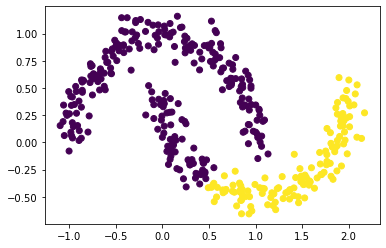

In [34]:
plt.scatter(X[:,0],X[:,1],c=labels_ag)

## DBSCAN

In [35]:
clus_db = DBSCAN()
labels_db = clus_db.fit_predict(X)

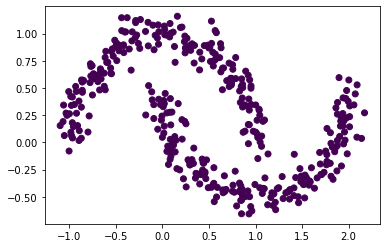

In [36]:
plt.scatter(X[:,0],X[:,1],c=labels_db)

## Finding Optimal Epsilon Value

In [37]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,7], axis=0)

Text(0, 0.5, 'Distance')

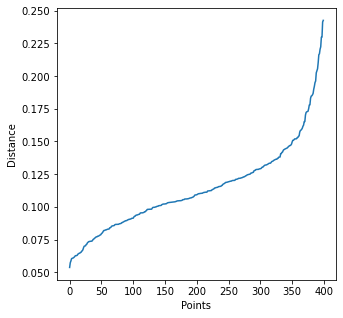

In [38]:
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")


In [39]:
clus_dbf = DBSCAN(eps=0.18,min_samples=8)
labels_dbf = clus_dbf.fit_predict(X)

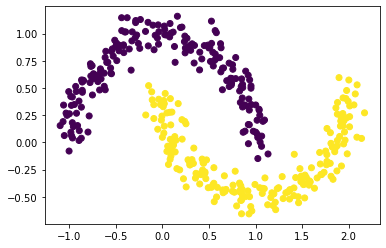

In [40]:
plt.scatter(X[:,0],X[:,1],c=labels_dbf)

In [41]:
models = [labels_km,labels_ag,labels_dbf]
vmeas = []
for labels in models:
    vmeas.append(v_measure_score(y,labels))

In [42]:
cols = ['kmeans','agglo','dbscan']

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

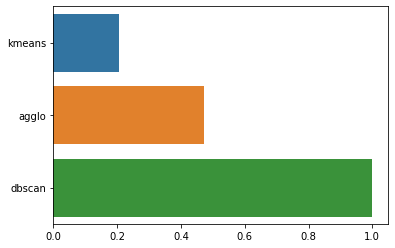

In [43]:
sns.barplot(vmeas,cols)